<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/Data_Loader_Making_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dr.Mobarak makes dataloader for KPI Challenge

In [ ]:
!gdown 1sj4VboAuonsDHsOqe5RzwXu1JXLbUNHi

Downloading...
From: https://drive.google.com/uc?id=1sj4VboAuonsDHsOqe5RzwXu1JXLbUNHi
To: /content/Sample Images.zip
100% 708k/708k [00:00<00:00, 107MB/s]


In [ ]:
!unzip SampleImages.zip

# https://drive.google.com/file/d/1sj4VboAuonsDHsOqe5RzwXu1JXLbUNHi/view?usp=sharing # The link to the zip file on my drive
# https://drive.google.com/file/d/1H5lPz93TPULZMA-rvi2laJsInK8bxOFw/view?usp=sharing # The link to the zip file for the SegCol Challenge

Archive:  SampleImages.zip
  inflating: 11-356_27_7168_1024_img.jpg  
  inflating: 11-356_27_7168_1024_mask.jpg  
  inflating: 56Nx_12_116_4_4096_0_img.jpg  
  inflating: 56Nx_12_116_4_4096_0_mask.jpg  


In [ ]:
!mkdir imgs

In [ ]:
cp *.jpg imgs

cp: cannot stat '*.jpg': No such file or directory


In [ ]:
import os
from glob import glob
from torch.utils.data import Dataset
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
from torchvision.transforms import InterpolationMode


class HPDataset(Dataset):
    def __init__(self, root, transform_img=None, transform_mask=None):
        self.transform_img=transform_img
        self.transform_mask=transform_mask
        self.dir_all = []
        self.dir_all.extend(glob(os.path.join(root,'*img.jpg')))

    def __len__(self):
        return len(self.dir_all)

    def __getitem__(self, idx):
        print(f'This is the idx {idx}')
        print(f'This is not indexed with idx {self.dir_all}')
        print(f'This is the directory indexed with idx {self.dir_all[idx]}')
        image = Image.open(self.dir_all[idx]).convert("RGB")
        mask_path = self.dir_all[idx].replace('_img','_mask')
        mask = Image.open(mask_path)
        image = self.transform_img(image)

        mask = self.transform_mask(mask)
        sample = dict(image=image, mask=mask)
        return sample

transform_img = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
        )
    ])

transform_mask = transforms.Compose([
    transforms.Resize((512, 512), interpolation=InterpolationMode.NEAREST),
    transforms.ToTensor(),
    ])

root = '/content/imgs'

dataset = HPDataset(root=root, transform_img=transform_img, transform_mask=transform_mask)
#dataloader_train =
#dataloader_test =
sample = dataset[0]

sample['image'].shape, sample['mask'].shape, sample['mask'].unique()
for sample in dataset:
    print(sample)


This is the idx 0
This is not indexed with idx ['/content/imgs/56Nx_12_116_4_4096_0_img.jpg', '/content/imgs/11-356_27_7168_1024_img.jpg']
This is the directory indexed with idx /content/imgs/56Nx_12_116_4_4096_0_img.jpg
This is the idx 0
This is not indexed with idx ['/content/imgs/56Nx_12_116_4_4096_0_img.jpg', '/content/imgs/11-356_27_7168_1024_img.jpg']
This is the directory indexed with idx /content/imgs/56Nx_12_116_4_4096_0_img.jpg
{'image': tensor([[[ 1.7523,  1.7009,  1.7009,  ...,  0.0741,  0.0741,  0.0741],
         [ 1.7009,  1.7009,  1.7009,  ...,  1.7009,  1.7009,  1.7009],
         [ 1.7009,  1.7009,  1.7009,  ...,  1.7009,  1.7180,  1.7180],
         ...,
         [ 0.5364,  0.5364,  0.5364,  ...,  1.6838,  1.7009,  1.7009],
         [ 0.5364,  0.5364,  0.5193,  ...,  1.6838,  1.7009,  1.6667],
         [ 0.5022,  0.5022,  0.5022,  ...,  1.6838,  1.7009,  1.6667]],

        [[ 1.6583,  1.6057,  1.6057,  ...,  0.0826,  0.0826,  0.0826],
         [ 1.6057,  1.6057,  1.6057

In [ ]:
mask = Image.open ('/content/imgs/11-356_27_7168_1024_mask.jpg')
mask = np.array(mask)
np.unique(mask)

array([  0, 255], dtype=uint8)

In [ ]:
root = '/content/imgs'
glob(os.path.join(root,'*img.jpg'))

['/content/imgs/11-356_27_7168_1024_img.jpg',
 '/content/imgs/56Nx_12_116_4_4096_0_img.jpg']

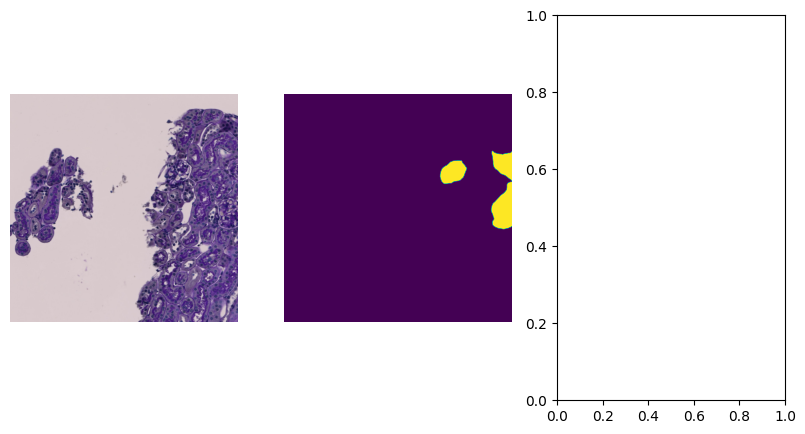

In [ ]:
# prompt: display jpg images as subplots

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

img1 = mpimg.imread('/content/11-356_27_7168_1024_img.jpg')
img2 = mpimg.imread('/content/11-356_27_7168_1024_mask.jpg')
#img3 = mpimg.imread('image3.jpg')

ax[0].imshow(img1)
ax[0].axis('off')
ax[1].imshow(img2)
ax[1].axis('off')
#ax[2].imshow(img3)
#ax[2].axis('off')

plt.show()


In [ ]:
# prompt: display 2 jpg images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


fig, ax = plt.subplots(1, 2, figsize=(10, 5))

img1 = mpimg.imread('/content/image1.jpg')
img2 = mpimg.imread('/content/image2.jpg')

ax[0].imshow(img1)
ax[0].axis('off')
ax[1].imshow(img2)
ax[1].axis('off')

plt.show()


_______
# Sergi Makes a Data Loader for UCL SegCol


In [ ]:
!gdown 1H5lPz93TPULZMA-rvi2laJsInK8bxOFw

Downloading...
From: https://drive.google.com/uc?id=1H5lPz93TPULZMA-rvi2laJsInK8bxOFw
To: /content/Seq_003_33040.zip
100% 14.5M/14.5M [00:00<00:00, 157MB/s]


In [ ]:
!unzip Seq_003_33040.zip

Archive:  Seq_003_33040.zip
   creating: Seq_003_33040/
   creating: Seq_003_33040/imgs/
  inflating: Seq_003_33040/imgs/frame_0000.png  
  inflating: Seq_003_33040/imgs/frame_0001.png  
  inflating: Seq_003_33040/imgs/frame_0002.png  
  inflating: Seq_003_33040/imgs/frame_0003.png  
  inflating: Seq_003_33040/imgs/frame_0004.png  
  inflating: Seq_003_33040/imgs/frame_0005.png  
  inflating: Seq_003_33040/imgs/frame_0006.png  
  inflating: Seq_003_33040/imgs/frame_0007.png  
  inflating: Seq_003_33040/imgs/frame_0008.png  
  inflating: Seq_003_33040/imgs/frame_0009.png  
  inflating: Seq_003_33040/imgs/frame_0010.png  
  inflating: Seq_003_33040/imgs/frame_0011.png  
  inflating: Seq_003_33040/imgs/frame_0012.png  
  inflating: Seq_003_33040/imgs/frame_0013.png  
  inflating: Seq_003_33040/imgs/frame_0014.png  
  inflating: Seq_003_33040/imgs/frame_0015.png  
  inflating: Seq_003_33040/imgs/frame_0016.png  
  inflating: Seq_003_33040/imgs/frame_0017.png  
  inflating: Seq_003_33040/im

In [ ]:
!mkdir train

mkdir: cannot create directory ‘train’: File exists


In [ ]:
import os
from glob import glob
from torch.utils.data import Dataset
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
from torchvision.transforms import InterpolationMode
import pandas as pd
import csv



class SegColDataset(Dataset):
    def __init__(self, root=None, train_list=None, transform_img=None, transform_mask=None):
        self.image_path = train_list
        print(self.image_path)
        self.mask_path = []
        for i in range(len(train_list)):
          #print(self.image_path[i][0])
          sequence_part = self.image_path[i][0].split('/')[1]
          mask_path = self.image_path[i][0].replace('imgs', 'segm_maps')
          mask_path = mask_path.replace('frame_', f'{sequence_part}_segm_map')
          #print(mask_path)

          # Replace '0000' with '0' (or '0001' with '1', etc.)
          base_name = os.path.basename(mask_path)
          # Split the base name to get the numerical part and extension
          name_part, extension = os.path.splitext(base_name)
          #print (f'\nThis is the base name {base_name} \nThis is the {name_part} \n and this is the extension {extension}')

          number_part = name_part.split('_')[-1].replace('map','')
          new_number_part = str(int(number_part))

          #print(f'\n{number_part}')
          #print(f'\n{new_number_part}')
          mask_path = mask_path.replace(number_part, f'_{new_number_part}')
          #print(f'\n{mask_path}')
          self.mask_path.append(mask_path)

        self.transform_img=transform_img
        self.transform_mask=transform_mask

    def __len__(self):
        return len(self.dir_all)

    def __getitem__(self, idx):
        print(f'This is the idx {idx}')
        print(f'This is not indexed with idx {self.mask_path}')
        print(f'This is the directory indexed with idx {self.mask_path[idx]}')
        image = Image.open(self.image_path[idx][0]).convert("RGB")
        mask_path = self.mask_path[idx]
        mask = Image.open(mask_path)
        image = self.transform_img(image)

        mask = self.transform_mask(mask)
        sample = dict(image=image, mask=mask)
        return sample

transform_img = transforms.Compose([
    transforms.Resize((640, 480)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
        )
    ])

transform_mask = transforms.Compose([
    transforms.Resize((640, 480), interpolation=InterpolationMode.NEAREST),
    transforms.ToTensor(),
    ])

root = '/content/imgs'


train_list = []
filename = 'train_list.csv'

with open(filename, mode='r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        train_list.append(row)


#train_list = np.loadtxt('train_list.csv', delimiter=',')

dataset = SegColDataset(root = None, train_list=train_list, transform_img=transform_img, transform_mask=transform_mask)
sample = dataset[0]

sample['image'].shape, sample['mask'].shape, sample['mask'].unique()
for sample in dataset:
     print(sample)


[['train/Seq_003_33040/imgs/frame_0000.png'], ['train/Seq_003_33040/imgs/frame_0001.png'], ['train/Seq_003_33040/imgs/frame_0002.png'], ['train/Seq_003_33040/imgs/frame_0003.png'], ['train/Seq_003_33040/imgs/frame_0004.png'], ['train/Seq_003_33040/imgs/frame_0005.png'], ['train/Seq_003_33040/imgs/frame_0006.png'], ['train/Seq_003_33040/imgs/frame_0007.png'], ['train/Seq_003_33040/imgs/frame_0008.png'], ['train/Seq_003_33040/imgs/frame_0009.png'], ['train/Seq_003_33040/imgs/frame_0010.png'], ['train/Seq_003_33040/imgs/frame_0011.png'], ['train/Seq_003_33040/imgs/frame_0012.png'], ['train/Seq_003_33040/imgs/frame_0013.png'], ['train/Seq_003_33040/imgs/frame_0014.png'], ['train/Seq_003_33040/imgs/frame_0015.png'], ['train/Seq_003_33040/imgs/frame_0016.png'], ['train/Seq_003_33040/imgs/frame_0017.png'], ['train/Seq_003_33040/imgs/frame_0018.png'], ['train/Seq_003_33040/imgs/frame_0019.png'], ['train/Seq_003_33040/imgs/frame_0020.png'], ['train/Seq_003_33040/imgs/frame_0021.png'], ['train/S

____
# Sergi Makes a Dataloader for COSAS

When you unzip change the file names to lowercase 'pancreas' and change 'Img' in the pancreas folder to 'image' and 'Mask' to 'mask'. Because I misnamed them when I uploaded it to drive

In [1]:
!gdown 1DFf6y7pJwxLiVBsrwrkrRhTCDj4aSBRm

Downloading...
From (original): https://drive.google.com/uc?id=1DFf6y7pJwxLiVBsrwrkrRhTCDj4aSBRm
From (redirected): https://drive.google.com/uc?id=1DFf6y7pJwxLiVBsrwrkrRhTCDj4aSBRm&confirm=t&uuid=f432487c-f71a-43b9-bed0-61d31231103d
To: /content/COSAS.zip
100% 282M/282M [00:09<00:00, 28.5MB/s]


In [2]:
!unzip COSAS.zip

Archive:  COSAS.zip
   creating: COSAS/
   creating: COSAS/colorectum/
   creating: COSAS/colorectum/image/
  inflating: COSAS/colorectum/image/030088ba5ecb.png  
  inflating: COSAS/colorectum/image/07cb317e69f4.png  
  inflating: COSAS/colorectum/image/14571cbe3412.png  
  inflating: COSAS/colorectum/image/1e5cda218b89.png  
  inflating: COSAS/colorectum/image/25280c2135e5.png  
  inflating: COSAS/colorectum/image/26441cc24032.png  
  inflating: COSAS/colorectum/image/272820482e5b.png  
  inflating: COSAS/colorectum/image/27d2746c9436.png  
  inflating: COSAS/colorectum/image/2abb3f331560.png  
  inflating: COSAS/colorectum/image/2d89117c7cef.png  
  inflating: COSAS/colorectum/image/326a1c18d2b2.png  
  inflating: COSAS/colorectum/image/3ab4e7ab76e2.png  
  inflating: COSAS/colorectum/image/47193c47708f.png  
  inflating: COSAS/colorectum/image/4db419cce0c4.png  
  inflating: COSAS/colorectum/image/562ef414f7d5.png  
  inflating: COSAS/colorectum/image/579d78c9bc86.png  
  inflating:

In [ ]:
!ls  COSAS/

colorectum  Pancreas


In [ ]:
import torch
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms.functional as F
import torchvision.transforms as transforms
# from torchvision.transforms import v2 as transforms

mask = Image.open('COSAS/colorectum/mask/fb3d40932188.png')
img = Image.open('COSAS/colorectum/image/fb3d40932188.png')
print(np.unique(np.array(mask)))

transform_mask = transforms.Compose([
    transforms.Resize((512, 512), interpolation=InterpolationMode.NEAREST),
    # transforms.ToTensor(),
    ])

mask = transform_mask( mask)
mask = torch.from_numpy(np.array(mask)).long()
mask.shape, mask.unique()

[0 1]


(torch.Size([512, 512]), tensor([0, 1]))

In [ ]:
img = Image.open('COSAS/colorectum/mask/fb3d40932188.png')
print('colorectum:',np.unique(np.array(mask)))

img = Image.open('COSAS/Pancreas/Mask/1c7493217d62.png')
print('Pancreas:',np.unique(np.array(mask)))

colorectum: [0 1]
Pancreas: [0 1]


In [ ]:
import os
from glob import glob
from torch.utils.data import Dataset
import numpy as np
import torch
import torchvision.transforms as transforms
# from torchvision.transforms import v2 as transforms
from PIL import Image
from torchvision.transforms import InterpolationMode
import pandas as pd
import csv

class COSASDataset(Dataset):
    def __init__(self, root, organs=['colorectum', 'pancreas','stomach'], transform_img=None, transform_mask=None):
        self.root = root
        self.organs = organs
        self.transform_img = transform_img
        self.transform_mask = transform_mask
        self.image_mask_pairs = []

        for organ in self.organs:
            image_path = os.path.join(self.root, organ, 'image')
            mask_path = os.path.join(self.root, organ, 'mask')

            image_files = sorted(glob(os.path.join(image_path, '*.png')))
            #print(image_files)

            for img_file in image_files:
                base_name = os.path.basename(img_file)
                mask_file = os.path.join(mask_path, base_name)
                #print(base_name)
                if os.path.exists(mask_file):
                    self.image_mask_pairs.append((img_file, mask_file))

    def __len__(self):
        return len(self.image_mask_pairs)

    def __getitem__(self, idx):
        img_path, mask_path = self.image_mask_pairs[idx]

        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        if self.transform_img:
            image = self.transform_img(image)
        if self.transform_mask:
            mask = self.transform_mask(mask)

        mask = torch.from_numpy(np.array(mask)).long()

        return {'image': image, 'mask': mask}

transform_img = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
        )
    ])

transform_mask = transforms.Compose([
    transforms.Resize((512, 512), interpolation=InterpolationMode.NEAREST),
    # transforms.ToTensor(),
    ])

root = '/content/COSAS/'
mask_root = '/content/train/Seq_003_33040/segm_maps'

dataset = COSASDataset(root, transform_img=transform_img, transform_mask=transform_mask)
#dataloader_train =
#dataloader_test =
print(len(dataset))
sample = dataset[0]
sample['mask'].unique(), sample['mask'].shape, sample['image'].shape

60


(tensor([0, 1]), torch.Size([512, 512]), torch.Size([3, 512, 512]))

(tensor([0, 1]), torch.Size([512, 512]), torch.Size([3, 512, 512]))

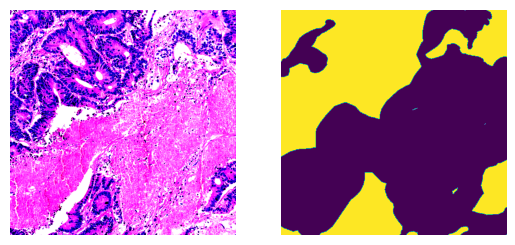

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(121);plt.axis('OFF');plt.imshow(sample['image'].permute(1, 2, 0))
plt.subplot(122);plt.axis('OFF');plt.imshow(sample['mask'])
sample['mask'].unique(), sample['mask'].shape, sample['image'].shape

[0 1]
255


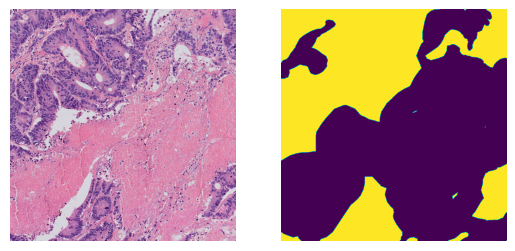

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
img_path = '/content/COSAS/colorectum/image/030088ba5ecb.png'
mask_path = '/content/COSAS/colorectum/mask/030088ba5ecb.png'
image = Image.open(img_path).convert("RGB")
mask = Image.open(mask_path).convert("L")
mask = np.array(mask)
print(np.unique(mask))
print(len(np.unique(image)))

plt.subplot(121);plt.axis('OFF');plt.imshow(image)
plt.subplot(122);plt.axis('OFF');plt.imshow(mask)

[0 1]


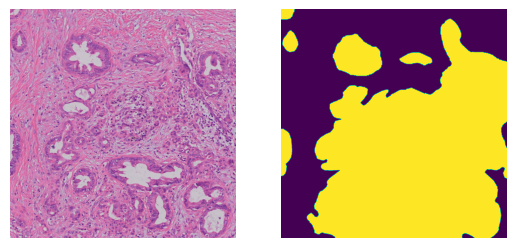

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
img_path = 'COSAS/Pancreas/Img/1c7493217d62.png'
mask_path = 'COSAS/Pancreas/Mask/1c7493217d62.png'
image = Image.open(img_path).convert("RGB")
mask = Image.open(mask_path).convert("L")
mask = np.array(mask)
print(np.unique(mask))

plt.subplot(121);plt.axis('OFF');plt.imshow(image)
plt.subplot(122);plt.axis('OFF');plt.imshow(mask)

In [11]:
!ls COSAS/Pancreas/

Img  Mask
